# 1. **Data Cleaning**

In [1671]:
import pandas as pd
import numpy as np

In [1672]:
df = pd.read_csv('/content/sample_data/laptop_price.csv', encoding='latin1')

In [1673]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [1674]:
df.shape

(1303, 13)

In [1675]:
df.describe()

,laptop_ID,Inches,Price_euros
count,1303.000000,1303.000000,1303.000000
mean,660.155794,15.017191,1123.686992
std,381.172104,1.426304,699.009043
min,1.000000,10.100000,174.000000
25%,331.500000,14.000000,599.000000
50%,659.000000,15.600000,977.000000
75%,990.500000,15.600000,1487.880000
max,1320.000000,18.400000,6099.000000


In [1676]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [1677]:
df.duplicated().sum()

np.int64(0)

In [1678]:
df.isnull().sum()

,0
laptop_ID,0
Company,0
Product,0
TypeName,0
Inches,0
ScreenResolution,0
Cpu,0
Ram,0
Memory,0
Gpu,0


In [1679]:
df['Ram'].value_counts()

,count
Ram,
8GB,619
4GB,375
16GB,200
6GB,41
12GB,25
2GB,22
32GB,17
24GB,3
64GB,1


In [1680]:
df['Ram'] = df['Ram'].str.replace('GB',' ')

In [1681]:
df['Weight'] = df['Weight'].str.replace('kg',' ')

In [1682]:
df['Ram'] = df['Ram'].astype('int32')
df['Weight'] = df['Weight'].astype('float')

In [1683]:
df.rename(columns={'Price_euros':'Price'},inplace=True)

In [1684]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60


# 2. **EDA & Feature Engineering**

In [1685]:
import seaborn as sns
import matplotlib.pyplot as plt


/tmp/ipython-input-499231142.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df["Price"],


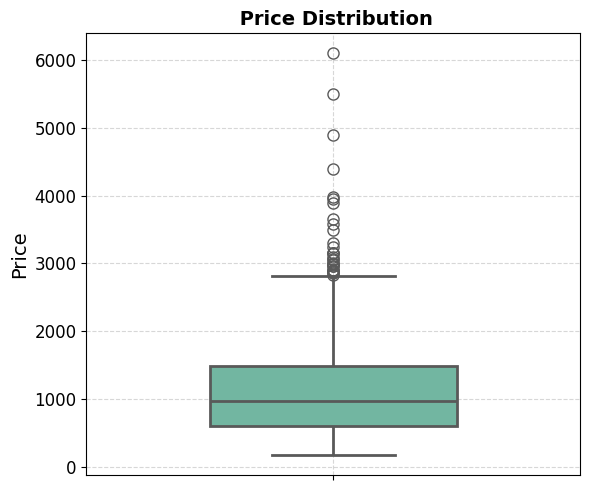

In [1686]:
plt.figure(figsize=(6, 5))
sns.boxplot(y=df["Price"],
            palette='Set2',
            linewidth=2,
            fliersize=8,
            width=0.5)


plt.title(' Price Distribution', fontsize=14, fontweight='bold')
plt.ylabel('Price', fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

/tmp/ipython-input-530179772.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df["Price"],


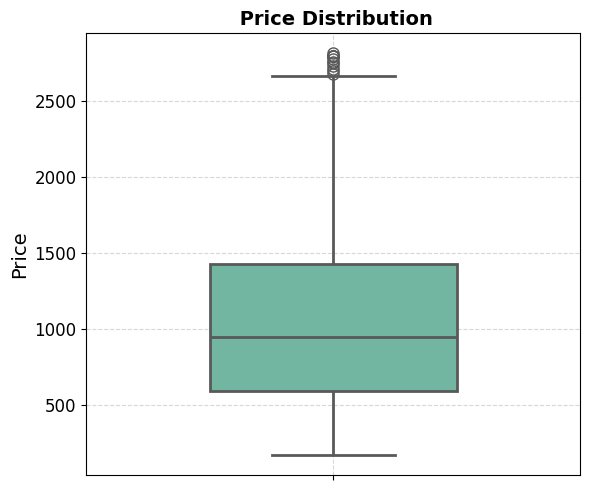

In [1687]:
# Calculating the IQR
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Removing the outliers
df = df[(df['Price'] >= lower_bound) & (df['Price'] <= upper_bound)]

plt.figure(figsize=(6, 5))
sns.boxplot(y=df["Price"],
            palette='Set2',
            linewidth=2,
            fliersize=8,
            width=0.5)

plt.title(' Price Distribution', fontsize=14, fontweight='bold')
plt.ylabel('Price', fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

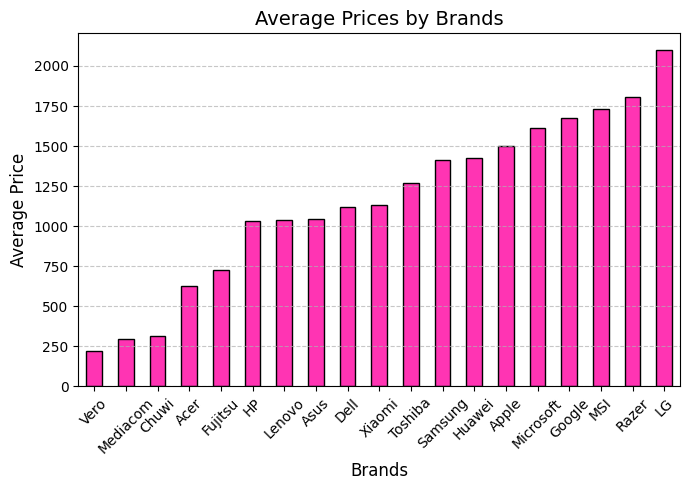

In [1688]:
average_prices = df.groupby('Company')['Price'].mean().sort_values()

plt.figure(figsize=(7, 5))
average_prices.plot(kind='bar', color='#ff34b3', edgecolor='black')

plt.title('Average Prices by Brands', fontsize=14)
plt.xlabel('Brands', fontsize=12)
plt.ylabel('Average Price', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

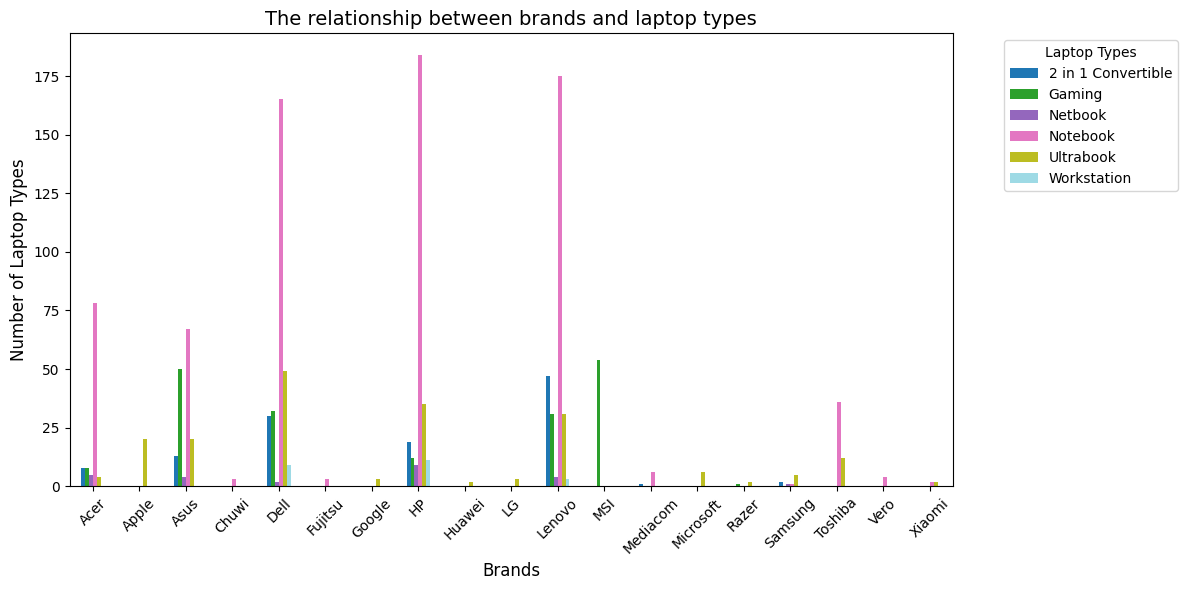

In [1689]:
company_type_count = df.groupby(['Company', 'TypeName']).size().unstack(fill_value=0)

company_type_count.plot(kind='bar', figsize=(12, 6), stacked=False, colormap='tab20')

plt.title('The relationship between brands and laptop types', fontsize=14)
plt.xlabel('Brands', fontsize=12)
plt.ylabel('Number of Laptop Types', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.legend(title='Laptop Types', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

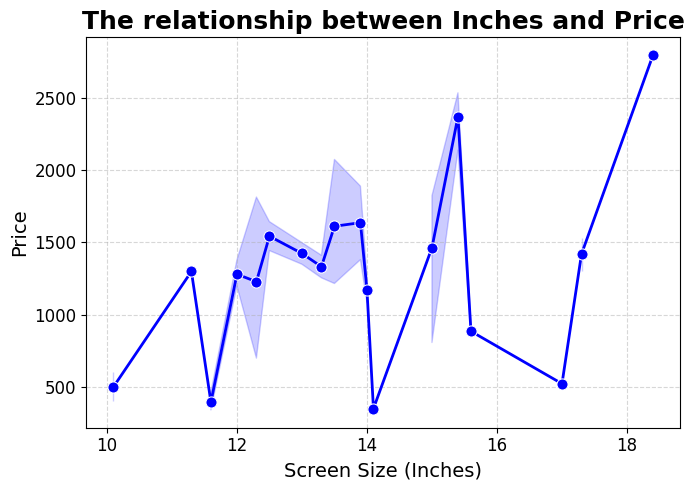

In [1690]:
plt.figure(figsize=(7, 5))

sns.lineplot(data=df, x='Inches', y='Price', marker='o', color='b', linewidth=2, markersize=8)

plt.title('The relationship between Inches and Price', fontsize=18, fontweight='bold')
plt.xlabel('Screen Size (Inches)', fontsize=14)
plt.ylabel('Price', fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

**Screen**

In [1691]:
df['ScreenResolution'].value_counts()

,count
ScreenResolution,
Full HD 1920x1080,501
1366x768,281
IPS Panel Full HD 1920x1080,220
IPS Panel Full HD / Touchscreen 1920x1080,53
Full HD / Touchscreen 1920x1080,47
1600x900,23
Touchscreen 1366x768,16
Quad HD+ / Touchscreen 3200x1800,15
IPS Panel 4K Ultra HD / Touchscreen 3840x2160,11


/tmp/ipython-input-161166220.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['ScreenResolution'], y=df['Price'], palette='Oranges')


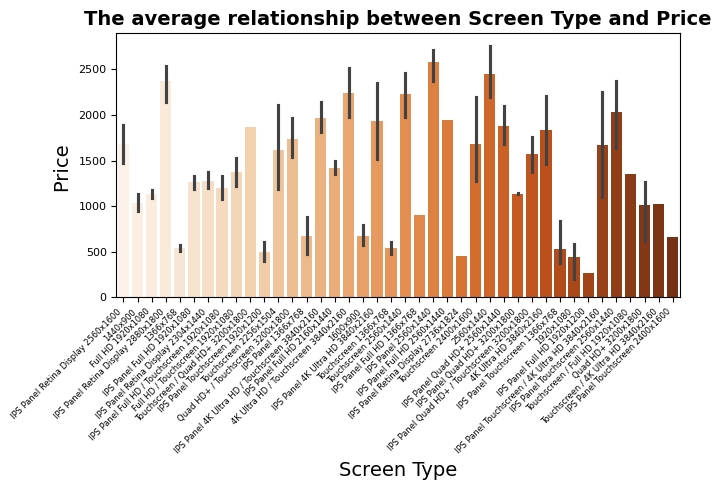

In [1692]:
plt.figure(figsize=(7, 5))

sns.barplot(x=df['ScreenResolution'], y=df['Price'], palette='Oranges')

plt.title('The average relationship between Screen Type and Price', fontsize=14, fontweight='bold')
plt.xlabel('Screen Type', fontsize=14)
plt.ylabel('Price ', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=6)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()

In [1693]:
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [1694]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0


<Axes: xlabel='Touchscreen'>

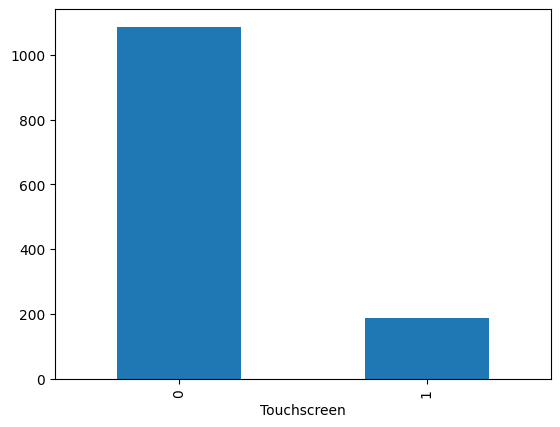

In [1695]:
df['Touchscreen'].value_counts().plot(kind='bar')

<Axes: xlabel='Touchscreen', ylabel='Price'>

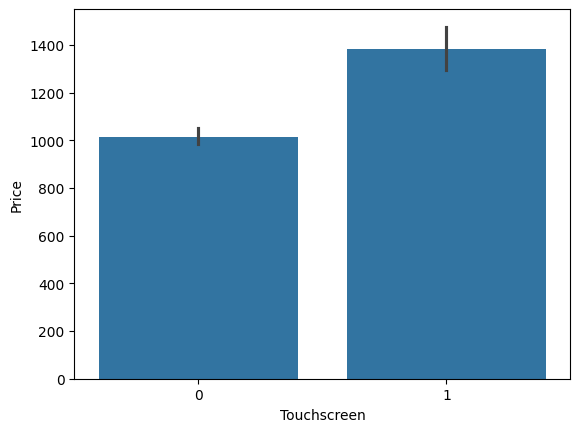

In [1696]:
sns.barplot(x=df['Touchscreen'],y=df['Price'])

In [1697]:
df['IPS'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

<Axes: xlabel='IPS', ylabel='Price'>

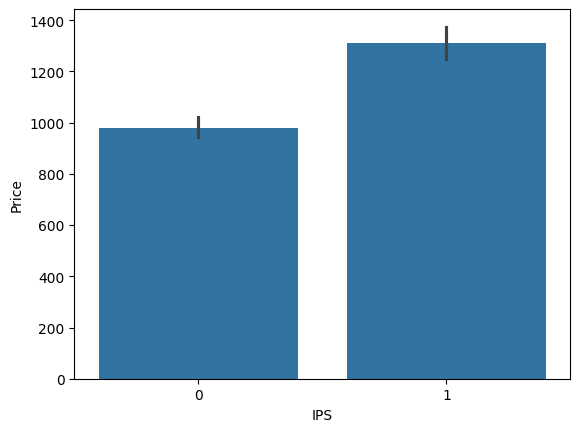

In [1698]:
sns.barplot(x=df['IPS'],y=df['Price'])

In [1699]:
new = df['ScreenResolution'].str.split('x',n=1, expand=True)

In [1700]:
df['X_res'] = new[0]
df['Y_res'] = new[1]

In [1701]:
df['X_res'] = df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [1702]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,X_res,Y_res
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,2560,1600
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,1440,900
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,1920,1080
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,2880,1800
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,2560,1600


In [1703]:
df['X_res'] = df['X_res'].astype('int')
df['Y_res'] = df['Y_res'].astype('int')

In [1704]:
df['ppi'] = (((df['X_res']**2)+(df['Y_res']**2))**0.5/df['Inches']).astype('float')

/tmp/ipython-input-2659374497.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


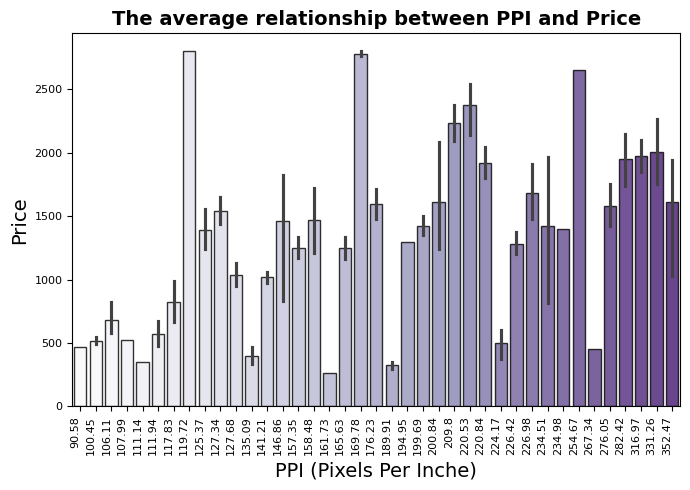

In [1751]:
df['ppi'] = df['ppi'].round(2)

plt.figure(figsize=(7, 5))

sns.barplot(
    x=df['ppi'],
    y=df['Price'],
    palette='Purples' ,
    edgecolor='black',
    alpha=0.8
)

plt.title('The average relationship between PPI and Price', fontsize=14, fontweight='bold')
plt.xlabel('PPI (Pixels Per Inche)', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.xticks(rotation=90, ha='right', fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()

In [1706]:
df.corr(numeric_only=True)['Price']

,Price
laptop_ID,0.072728
Inches,-0.016702
Ram,0.714262
Weight,0.080449
Price,1.000000
Touchscreen,0.218059
IPS,0.246343
X_res,0.533609
Y_res,0.531351
ppi,0.478622


In [1707]:
df.drop(columns=['ScreenResolution', 'Inches', 'X_res', 'Y_res'],inplace=True)

In [1708]:
df.head()

,laptop_ID,Company,Product,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi
0,1,Apple,MacBook Pro,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,226.98
1,2,Apple,Macbook Air,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,127.68
2,3,HP,250 G6,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,141.21
3,4,Apple,MacBook Pro,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,220.53
4,5,Apple,MacBook Pro,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,226.98


**CPU**

In [1709]:
df['Cpu'].value_counts()

,count
Cpu,
Intel Core i5 7200U 2.5GHz,190
Intel Core i7 7700HQ 2.8GHz,134
Intel Core i7 7500U 2.7GHz,133
Intel Core i7 8550U 1.8GHz,73
Intel Core i5 8250U 1.6GHz,72
...,...
Intel Core i5 7200U 2.70GHz,1
Intel Core M M7-6Y75 1.2GHz,1
Intel Core M 6Y54 1.1GHz,1


In [1710]:
import re
def extract_cpu_manufacturer(cpu):
    return cpu.split()[0]  # It takes the first word

def extract_cpu_model(cpu):
    match = re.search(r'i[3579][- ]?\d+[A-Za-z]*', cpu, re.IGNORECASE)
    return match.group() if match else None  #it finds the model number

def extract_clock_speed(cpu):
    match = re.search(r'[\d\.]+GHz', cpu)  #It finds the GHz speed.
    return float(match.group()[:-3]) if match else None

In [1711]:
df['CPU Manufacturer'] = df['Cpu'].apply(extract_cpu_manufacturer)
order = ['i3', 'i5', 'i7', 'i9']
df['CPU Model'] = df['Cpu'].apply(extract_cpu_model) # Create CPU Model first
df['CPU Prefix'] = df['CPU Model'].str.extract(r'(i[3579])', expand=False) # Then use it for CPU Prefix
df['Clock Speed (GHz)'] = df['Cpu'].apply(extract_clock_speed)

/tmp/ipython-input-229556850.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['CPU Manufacturer'], y=df['Price'], palette='dark')


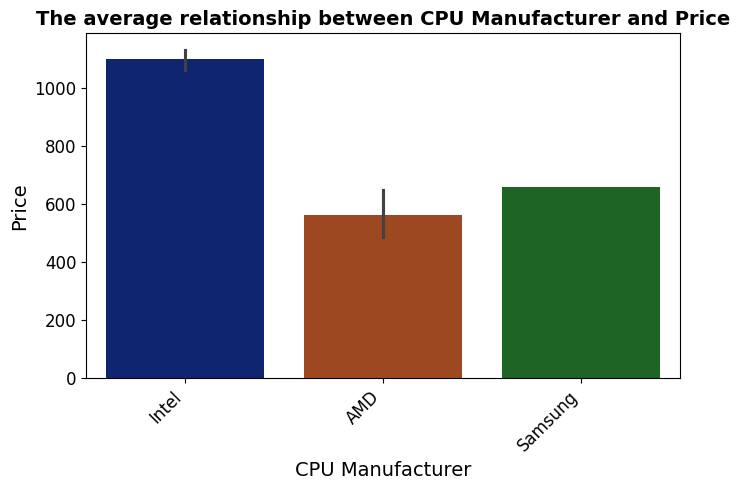

In [1712]:
plt.figure(figsize=(7, 5))

sns.barplot(x=df['CPU Manufacturer'], y=df['Price'], palette='dark')
plt.title('The average relationship between CPU Manufacturer and Price', fontsize=14, fontweight='bold')
plt.xlabel('CPU Manufacturer', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

/tmp/ipython-input-617945510.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


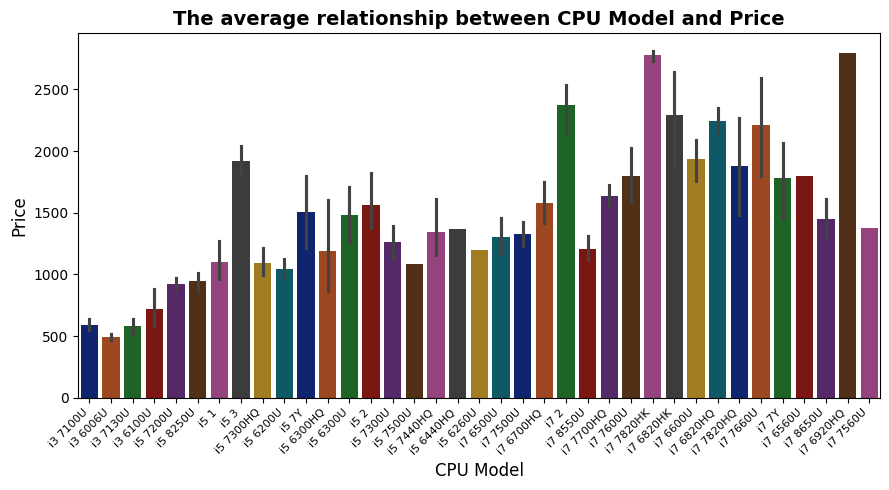

In [1713]:
mapping = {cpu: idx for idx, cpu in enumerate(order)}

df_sorted = df.sort_values(by='CPU Prefix', key=lambda x: x.map(mapping))

plt.figure(figsize=(9, 5))

sns.barplot(
    x=df_sorted['CPU Model'],
    y=df_sorted['Price'],
    palette='dark'
)

plt.title('The average relationship between CPU Model and Price', fontsize=14, fontweight='bold')
plt.xlabel('CPU Model', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.tight_layout()
plt.show()

/tmp/ipython-input-2179469718.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


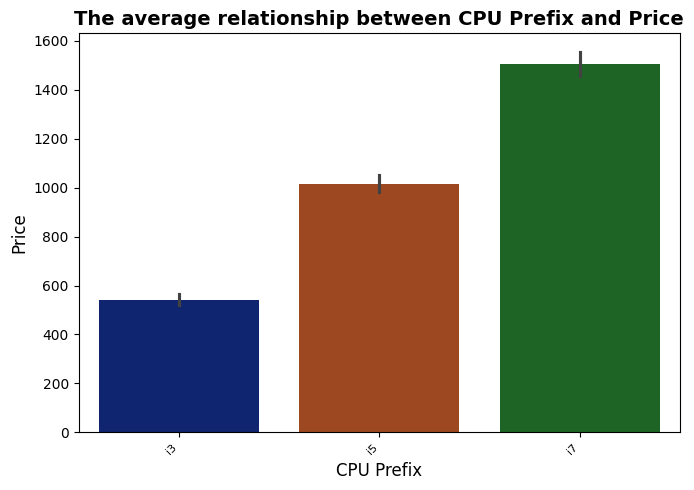

In [1714]:
plt.figure(figsize=(7, 5))

sns.barplot(
    x=df_sorted['CPU Prefix'],
    y=df_sorted['Price'],
    palette='dark'
)

plt.title('The average relationship between CPU Prefix and Price', fontsize=14, fontweight='bold')
plt.xlabel('CPU Prefix', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.tight_layout()
plt.show()

/tmp/ipython-input-3540353712.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['Clock Speed (GHz)'], y=df['Price'], palette='dark')


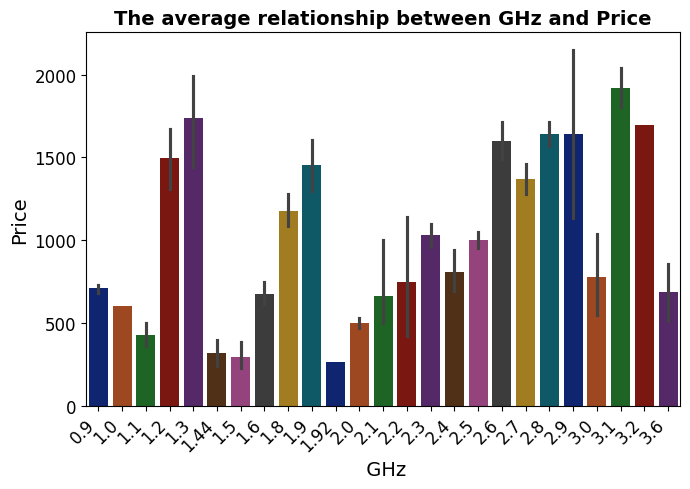

In [1715]:
plt.figure(figsize=(7, 5))

sns.barplot(x=df['Clock Speed (GHz)'], y=df['Price'], palette='dark')
plt.title('The average relationship between GHz and Price', fontsize=14, fontweight='bold')
plt.xlabel(' GHz', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

In [1716]:
df.sample(3)

,laptop_ID,Company,Product,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,CPU Manufacturer,CPU Model,CPU Prefix,Clock Speed (GHz)
909,922,LG,Gram 14Z970,Ultrabook,Intel Core i7 7500U 2.7GHz,8,512GB SSD,Intel HD Graphics 620,Windows 10,0.98,1899.0,1,1,157.35,Intel,i7 7500U,i7,2.7
22,23,HP,255 G6,Notebook,AMD E-Series E2-9000e 1.5GHz,4,500GB HDD,AMD Radeon R2,No OS,1.86,258.0,0,0,100.45,AMD,None,None,1.5
492,499,Asus,VivoBook Pro,Gaming,Intel Core i7 7700HQ 2.8GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,1.99,1350.0,0,0,141.21,Intel,i7 7700HQ,i7,2.8


**Memory ( RAM & ROM )**

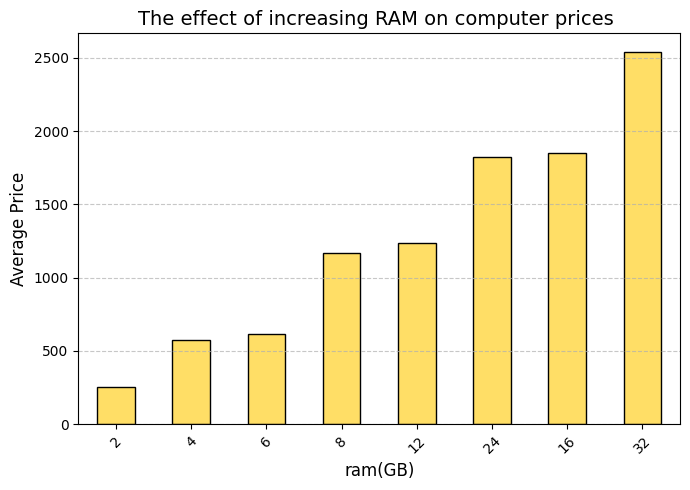

In [1717]:
average_prices = df.groupby('Ram')['Price'].mean().sort_values()
plt.figure(figsize=(7, 5))
average_prices.plot(kind='bar', color='#ffde66', edgecolor='black')
plt.title('The effect of increasing RAM on computer prices ', fontsize=14)
plt.xlabel('ram(GB)', fontsize=12)
plt.ylabel('Average Price', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [1718]:
df['Memory'].value_counts()

,count
Memory,
256GB SSD,407
1TB HDD,222
500GB HDD,132
512GB SSD,113
128GB SSD + 1TB HDD,93
128GB SSD,76
256GB SSD + 1TB HDD,70
32GB Flash Storage,38
2TB HDD,16


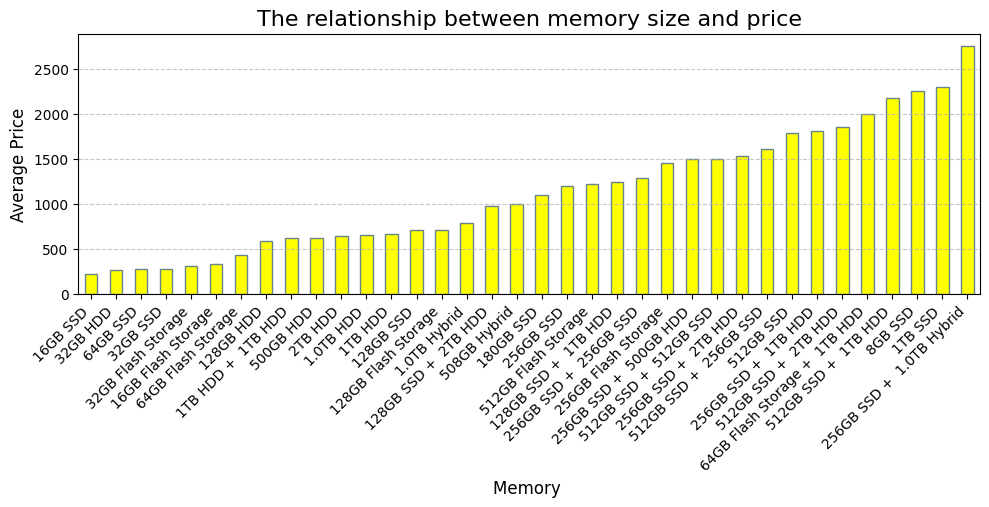

In [1719]:
average_prices = df.groupby('Memory')['Price'].mean().sort_values()
plt.figure(figsize=(10, 6))
average_prices.plot(kind='bar', color='yellow', edgecolor='#68838b')
plt.title('The relationship between memory size and price', fontsize=16)
plt.xlabel('Memory ', fontsize=12)
plt.ylabel('Average Price', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.subplots_adjust(bottom=0.5)
plt.show()

In [1720]:
df.head()

,laptop_ID,Company,Product,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,CPU Manufacturer,CPU Model,CPU Prefix,Clock Speed (GHz)
0,1,Apple,MacBook Pro,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,226.98,Intel,i5 2,i5,2.3
1,2,Apple,Macbook Air,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,127.68,Intel,i5 1,i5,1.8
2,3,HP,250 G6,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,141.21,Intel,i5 7200U,i5,2.5
3,4,Apple,MacBook Pro,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,220.53,Intel,i7 2,i7,2.7
4,5,Apple,MacBook Pro,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,226.98,Intel,i5 3,i5,3.1


**GPU**

In [1721]:
df['Gpu'].value_counts()

,count
Gpu,
Intel HD Graphics 620,280
Intel HD Graphics 520,185
Intel UHD Graphics 620,68
Nvidia GeForce GTX 1050,66
Nvidia GeForce GTX 1060,46
...,...
AMD Radeon R5 M315,1
Nvidia Quadro M500M,1
AMD Radeon R7 M360,1


In [1722]:
def extract_gpu_manufacturer(gpu):
    gpu = gpu.lower()
    if "nvidia" in gpu:
        return "NVIDIA"
    elif "intel" in gpu:
        return "Intel"
    elif "amd" in gpu:
        return "AMD"
    else:
        return "Other"

def extract_gpu_model(gpu):
    parts = gpu.split()

    manufacturers = ["NVIDIA", "Intel", "AMD"]

    if parts[0].capitalize() in manufacturers:
        return " ".join(parts[1:])
    else:
        return " ".join(parts)


In [1723]:
df['GPU Manufacturer'] = df['Gpu'].apply(extract_gpu_manufacturer)
df['GPU Model'] = df['Gpu'].apply(extract_gpu_model)

In [1724]:
df.sample(5)

,laptop_ID,Company,Product,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,CPU Manufacturer,CPU Model,CPU Prefix,Clock Speed (GHz),GPU Manufacturer,GPU Model
781,790,Asus,Rog G752VS-BA171T,Gaming,Intel Core i7 6700HQ 2.6GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,4.30,2350.00,0,1,127.34,Intel,i7 6700HQ,i7,2.6,NVIDIA,Nvidia GeForce GTX 1070
695,703,Acer,TravelMate B117-M,Netbook,Intel Celeron Dual Core N3050 1.6GHz,4,32GB Flash Storage,Intel HD Graphics,Windows 10,1.40,269.00,0,0,135.09,Intel,None,None,1.6,Intel,HD Graphics
273,278,Lenovo,ThinkPad X1,2 in 1 Convertible,Intel Core i7 6600U 2.6GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.36,2499.00,1,0,209.80,Intel,i7 6600U,i7,2.6,Intel,HD Graphics 520
1038,1052,Dell,Latitude E5570,Notebook,Intel Core i5 6300U 2.4GHz,8,256GB SSD,Intel HD Graphics 520,Windows 7,2.09,1062.95,0,0,141.21,Intel,i5 6300U,i5,2.4,Intel,HD Graphics 520
1184,1202,HP,Pavilion 15-BC000nv,Notebook,Intel Core i7 6700HQ 2.6GHz,6,1TB HDD,Nvidia GeForce GTX 960M,Windows 10,2.18,799.00,0,1,141.21,Intel,i7 6700HQ,i7,2.6,NVIDIA,Nvidia GeForce GTX 960M


/tmp/ipython-input-3943902746.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['GPU Manufacturer'], y=df['Price'], palette='dark')


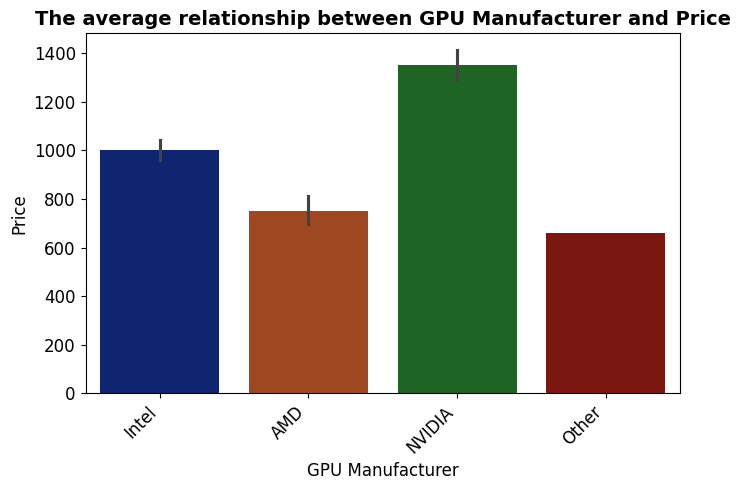

In [1725]:
plt.figure(figsize=(7, 5))

sns.barplot(x=df['GPU Manufacturer'], y=df['Price'], palette='dark')
plt.title('The average relationship between GPU Manufacturer and Price', fontsize=14, fontweight='bold')
plt.xlabel('GPU Manufacturer', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

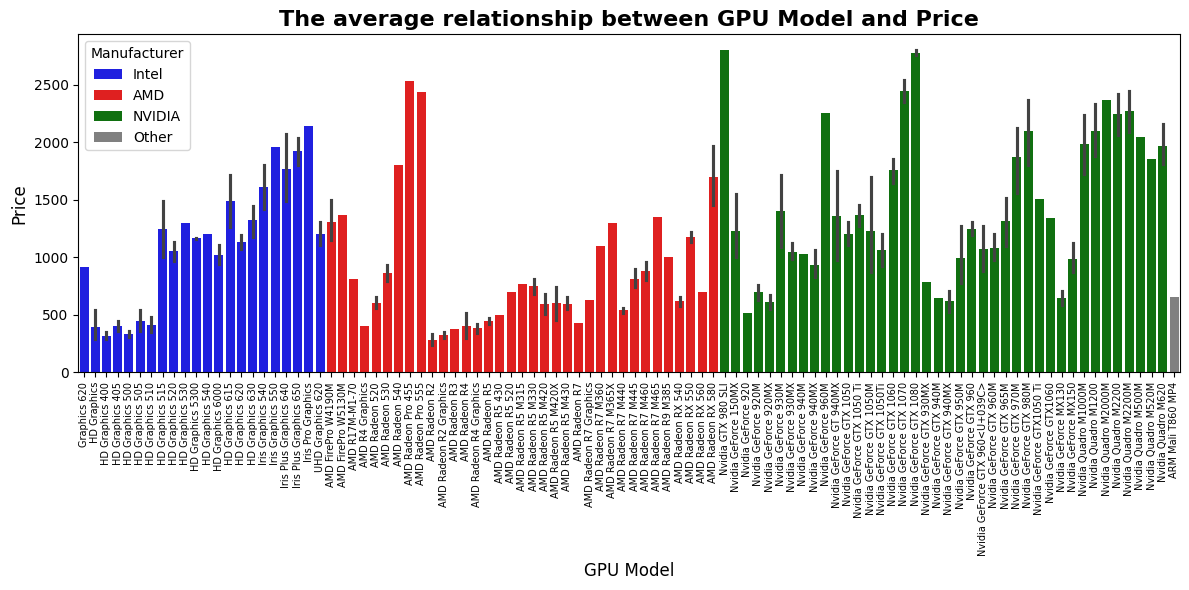

In [1726]:
sort_order = {
    "Intel": 0,
    "AMD": 1,
    "NVIDIA": 2,
    "Other": 3
}

df['gpu_order'] = df['GPU Manufacturer'].map(sort_order)

df_sorted = df.sort_values(by=['gpu_order', 'GPU Model'])

plt.figure(figsize=(12, 6))

sns.barplot(
    x=df_sorted['GPU Model'],
    y=df_sorted['Price'],
    hue=df_sorted['GPU Manufacturer'],   # color by manufacturer
    dodge=False,                         # single bar per model
    palette={"Intel": "blue", "AMD": "red", "NVIDIA": "green", "Other" : "Grey"}
)

plt.title('The average relationship between GPU Model and Price', fontsize=16, fontweight='bold')
plt.xlabel('GPU Model', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.xticks(rotation=90, fontsize=7)
plt.yticks(fontsize=10)
plt.legend(title="Manufacturer")
plt.tight_layout()
plt.show()


To make the plot more readable, let's visualize the average price by `GPU Manufacturer` first, as there are fewer unique manufacturers.

In [1727]:
df.sample(3)

,laptop_ID,Company,Product,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,...,Touchscreen,IPS,ppi,CPU Manufacturer,CPU Model,CPU Prefix,Clock Speed (GHz),GPU Manufacturer,GPU Model,gpu_order
220,225,Dell,Inspiron 3576,Notebook,Intel Core i5 8250U 1.6GHz,8,256GB SSD,AMD Radeon 520,Linux,2.2,...,0,0,141.21,Intel,i5 8250U,i5,1.6,AMD,AMD Radeon 520,1
223,228,HP,ProBook 450,Notebook,Intel Core i5 8250U 1.6GHz,8,1TB HDD,Intel UHD Graphics 620,Windows 10,2.1,...,0,0,141.21,Intel,i5 8250U,i5,1.6,Intel,UHD Graphics 620,0
195,199,HP,ProBook 470,Notebook,Intel Core i5 8250U 1.6GHz,8,1TB HDD,Nvidia GeForce 930MX,Windows 10,2.5,...,0,1,127.34,Intel,i5 8250U,i5,1.6,NVIDIA,Nvidia GeForce 930MX,2


**OpSystem**

In [1728]:
df['OpSys'].value_counts()

,count
OpSys,
Windows 10,1048
No OS,66
Linux,62
Windows 7,41
Chrome OS,27
macOS,12
Mac OS X,8
Windows 10 S,8
Android,2


/tmp/ipython-input-3256581921.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['OpSys'], y=df['Price'], palette='dark')


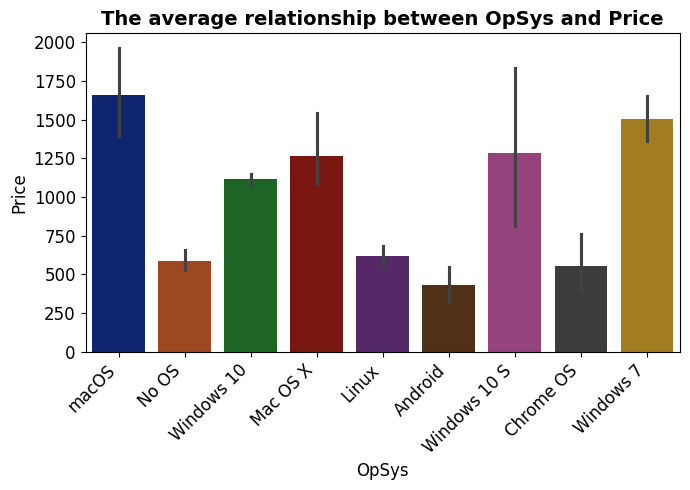

In [1729]:
plt.figure(figsize=(7, 5))


sns.barplot(x=df['OpSys'], y=df['Price'], palette='dark')
plt.title('The average relationship between OpSys and Price', fontsize=14, fontweight='bold')
plt.xlabel('OpSys', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

In [1730]:
def cat_os(text):
  if text == 'Windows 10' or text == 'Windows 7' or text == 'Windows 10 S':
    return 'Windows'
  elif text == 'macOS' or text == 'Mac OS X':
    return 'Mac'
  else:
    return 'Others/No OS/Linux'

In [1731]:
df['os'] = df['OpSys'].apply(cat_os)

In [1732]:
df.drop(columns=['OpSys'], inplace=True)

In [1733]:
df.head()

,laptop_ID,Company,Product,TypeName,Cpu,Ram,Memory,Gpu,Weight,Price,...,IPS,ppi,CPU Manufacturer,CPU Model,CPU Prefix,Clock Speed (GHz),GPU Manufacturer,GPU Model,gpu_order,os
0,1,Apple,MacBook Pro,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,1.37,1339.69,...,1,226.98,Intel,i5 2,i5,2.3,Intel,Iris Plus Graphics 640,0,Mac
1,2,Apple,Macbook Air,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,1.34,898.94,...,0,127.68,Intel,i5 1,i5,1.8,Intel,HD Graphics 6000,0,Mac
2,3,HP,250 G6,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,1.86,575.00,...,0,141.21,Intel,i5 7200U,i5,2.5,Intel,HD Graphics 620,0,Others/No OS/Linux
3,4,Apple,MacBook Pro,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,1.83,2537.45,...,1,220.53,Intel,i7 2,i7,2.7,AMD,AMD Radeon Pro 455,1,Mac
4,5,Apple,MacBook Pro,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,1.37,1803.60,...,1,226.98,Intel,i5 3,i5,3.1,Intel,Iris Plus Graphics 650,0,Mac


**Weight**

/tmp/ipython-input-1125578356.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Weight'])


<Axes: xlabel='Weight', ylabel='Density'>

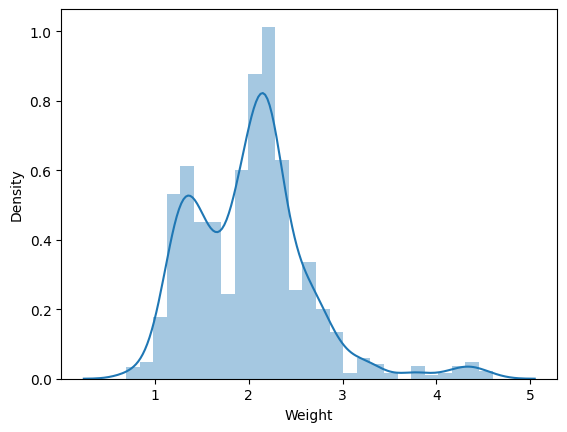

In [1734]:
sns.distplot(df['Weight'])

In [1735]:
df.corr(numeric_only=True)['Price']

,Price
laptop_ID,0.072728
Ram,0.714262
Weight,0.080449
Price,1.000000
Touchscreen,0.218059
IPS,0.246343
ppi,0.478622
Clock Speed (GHz),0.429409
gpu_order,0.226754


<Axes: >

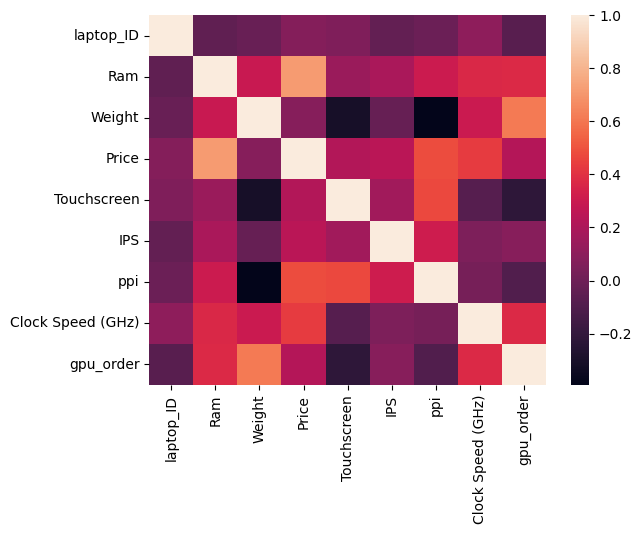

In [1736]:
sns.heatmap(df.corr(numeric_only=True))

# **3. Model**

/tmp/ipython-input-3556049916.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df['Price']))


<Axes: xlabel='Price', ylabel='Density'>

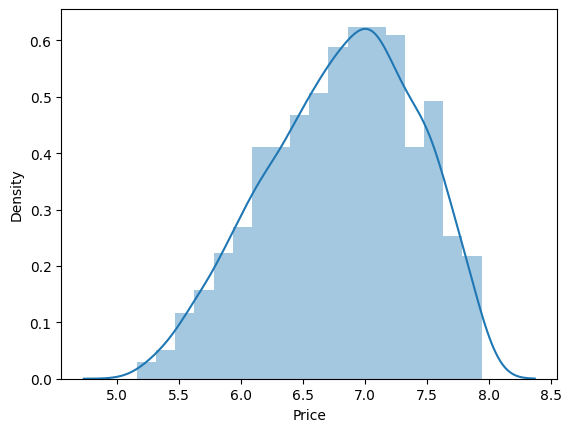

In [1737]:
sns.distplot(np.log(df['Price']))

In [1738]:
X = df.drop(columns=['Price', 'laptop_ID', 'Product', 'Gpu', 'Cpu'])
y = np.log(df['Price'])

In [1739]:
X

,Company,TypeName,Ram,Memory,Weight,Touchscreen,IPS,ppi,CPU Manufacturer,CPU Model,CPU Prefix,Clock Speed (GHz),GPU Manufacturer,GPU Model,gpu_order,os
0,Apple,Ultrabook,8,128GB SSD,1.37,0,1,226.98,Intel,i5 2,i5,2.3,Intel,Iris Plus Graphics 640,0,Mac
1,Apple,Ultrabook,8,128GB Flash Storage,1.34,0,0,127.68,Intel,i5 1,i5,1.8,Intel,HD Graphics 6000,0,Mac
2,HP,Notebook,8,256GB SSD,1.86,0,0,141.21,Intel,i5 7200U,i5,2.5,Intel,HD Graphics 620,0,Others/No OS/Linux
3,Apple,Ultrabook,16,512GB SSD,1.83,0,1,220.53,Intel,i7 2,i7,2.7,AMD,AMD Radeon Pro 455,1,Mac
4,Apple,Ultrabook,8,256GB SSD,1.37,0,1,226.98,Intel,i5 3,i5,3.1,Intel,Iris Plus Graphics 650,0,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,128GB SSD,1.80,1,1,157.35,Intel,i7 6500U,i7,2.5,Intel,HD Graphics 520,0,Windows
1299,Lenovo,2 in 1 Convertible,16,512GB SSD,1.30,1,1,276.05,Intel,i7 6500U,i7,2.5,Intel,HD Graphics 520,0,Windows
1300,Lenovo,Notebook,2,64GB Flash Storage,1.50,0,0,111.94,Intel,None,None,1.6,Intel,HD Graphics,0,Windows
1301,HP,Notebook,6,1TB HDD,2.19,0,0,100.45,Intel,i7 6500U,i7,2.5,AMD,AMD Radeon R5 M330,1,Windows


In [1740]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=2)

In [1741]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score, mean_absolute_error

In [1742]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# **Linear Regression**

In [1743]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first', handle_unknown='ignore'),[0,1,3,8,9,10,12,13,15])
], remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 Score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 Score 0.8758041108123672
MAE 0.1633832147980609


/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2, 7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


# **Ridge Regression**

In [1744]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first', handle_unknown='ignore'),[0,1,3,8,9,10,12,13,15])
], remainder='passthrough')

step2 = Ridge(alpha=10)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 Score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 Score 0.862862206145222
MAE 0.17191530726009727


/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2, 7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


# **KNN**

In [1745]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first', handle_unknown='ignore'),[0,1,3,8,9,10,12,13,15])
], remainder='passthrough')

step2 = KNeighborsRegressor(n_neighbors=3)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 Score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 Score 0.8298391622736508
MAE 0.18118541424653278


/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2, 7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


# **Decision Tree**

In [1746]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first', handle_unknown='ignore'),[0,1,3,8,9,10,12,13,15])
], remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 Score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 Score 0.8192875787425128
MAE 0.19082434426810116


/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2, 7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


# **Random Forest**

In [1747]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first', handle_unknown='ignore'),[0,1,3,8,9,10,12,13,15])
], remainder='passthrough')

step2 = XGBRegressor(n_estimators=45, max_depth=5, learning_rate=0.5)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 Score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 Score 0.8917866816453257
MAE 0.15137737089653536


/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2, 7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


# **XGBoost**

In [1748]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first', handle_unknown='ignore'),[0,1,3,8,9,10,12,13,15])
], remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100, random_state=3, max_samples=0.5, max_features=0.75, max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 Score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 Score 0.8925387925971306
MAE 0.15331279408300438


/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2, 7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


# **4. Model Evaluation**

In [1749]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import numpy as np

models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(alpha=10),
    "KNN": KNeighborsRegressor(n_neighbors=3),
    "DecisionTree": DecisionTreeRegressor(max_depth=8),
    "RandomForest": RandomForestRegressor(
        n_estimators=100, random_state=3,
        max_samples=0.5, max_features=0.75, max_depth=15
    ),
    "XGBoost": XGBRegressor(
        n_estimators=45, max_depth=5, learning_rate=0.5,
        objective='reg:squarederror'
    )
}

results = {}

step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(
        sparse_output=False,
        drop='first',
        handle_unknown='ignore'
    ), [0,1,3,8,9,10,12,13,15])
], remainder='passthrough')

for name, model in models.items():
    pipe = Pipeline([
        ('step1', step1),
        ('step2', model)
    ])

    #  R²
    scores_r2 = cross_val_score(pipe, X, y, cv=5, scoring='r2')

    #  RMSE
    scores_rmse = cross_val_score(
        pipe, X, y, cv=5,
        scoring='neg_root_mean_squared_error'
    )
    scores_rmse = -scores_rmse

    results[name] = (
        scores_r2.mean(),
        scores_r2.std(),
        scores_rmse.mean(),
        scores_rmse.std()
    )

    print(f"{name:15s} | Mean R² = {scores_r2.mean():.4f} | RMSE = {scores_rmse.mean():.4f}")

df_results = pd.DataFrame(
    results,
    index=["Mean R²", "Std R²", "Mean RMSE", "Std RMSE"]
).T

df_results.sort_values("Mean R²", ascending=False)


/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0, 2, 4, 7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2, 4, 7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2, 4, 7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2, 4, 7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserW

LinearRegression | Mean R² = 0.8106 | RMSE = 0.2525


/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2, 4, 7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2, 4, 7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2, 4, 7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2, 3, 6, 7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserW

Ridge           | Mean R² = 0.8270 | RMSE = 0.2417


/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0, 2, 4, 7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2, 4, 7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2, 4, 7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2, 4, 7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserW

KNN             | Mean R² = 0.8026 | RMSE = 0.2608


/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2, 4, 7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2, 4, 7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2, 3, 6, 7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0, 2, 4, 7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: Us

DecisionTree    | Mean R² = 0.7728 | RMSE = 0.2749


/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0, 2, 4, 7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2, 4, 7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2, 4, 7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2, 4, 7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserW

RandomForest    | Mean R² = 0.8578 | RMSE = 0.2205


/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2, 4, 7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2, 4, 7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2, 3, 6, 7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0, 2, 4, 7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: Us

XGBoost         | Mean R² = 0.8577 | RMSE = 0.2203


/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2, 4, 7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2, 3, 6, 7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


,Mean R²,Std R²,Mean RMSE,Std RMSE
RandomForest,0.857797,0.031676,0.220544,0.015114
XGBoost,0.857709,0.034850,0.220250,0.016349
Ridge,0.826961,0.053102,0.241726,0.026335
LinearRegression,0.810576,0.060012,0.252486,0.034038
KNN,0.802617,0.034652,0.260782,0.014696
DecisionTree,0.772789,0.045712,0.274906,0.013764


# **5. Exporting the Model**

In [1750]:
import pickle

pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))